In [8]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import seaborn as sns

%matplotlib inline

#### Import pickled stop words from `Effects of Stop Words Elimination for Arabic Information Retrieval: A Comparative Study`

In [71]:
stop_words_df = pd.read_pickle('/home/jovyan/capstone-52/topic_modeling_experiments/pickled_stopwords/comp_study_stopwords.p')

In [72]:
stop_words_df.columns = ["stop_words"]

In [73]:
stop_words_df.columns

Index(['stop_words'], dtype='object')

In [75]:
dfList_stopwords = stop_words_df['stop_words'].tolist()

In [76]:
dfList_stopwords[:4]

['انها', 'اثناء', 'اجل', 'احدا']

In [43]:
pd.set_option('display.max_colwidth', -1)

In [17]:
cd Pickled_from_mongo/

/home/jovyan/capstone-52/Pickled_from_mongo


In [77]:
df = pd.read_pickle('../Pickled_from_mongo/combined_eg_gulf.p')

In [78]:
df = df.drop(['_id', ], axis=1)

In [79]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 940 entries, 0 to 421
Data columns (total 4 columns):
cleaned_geo     940 non-null object
cleaned_name    940 non-null object
cleaned_text    940 non-null object
class           940 non-null object
dtypes: object(4)
memory usage: 36.7+ KB


## Benchmark LSA with stop words

### Label Encode the Categories


In [80]:
from sklearn.preprocessing import LabelEncoder

In [81]:
le = LabelEncoder()
df['class_numerical'] = le.fit_transform(df['class'])

### Prepare Document Term Matrix


In [62]:
from sklearn.feature_extraction.text import TfidfVectorizer

In [86]:
tfidf_vectorizer = TfidfVectorizer(min_df = 1, stop_words= dfList_stopwords)

### TFIDF

In [87]:
document_term_matrix_sps = tfidf_vectorizer.fit_transform(df.cleaned_text)

In [88]:
document_term_matrix_sps


<940x4078 sparse matrix of type '<class 'numpy.float64'>'
	with 8248 stored elements in Compressed Sparse Row format>

In [89]:
document_term_matrix_df = pd.DataFrame(document_term_matrix_sps.toarray(),
                                       index=df.index,
                                       columns=tfidf_vectorizer.get_feature_names())

### Compute SVD of Document Term Matrix

In [90]:
from sklearn.decomposition import TruncatedSVD

In [91]:
n_components = 2
SVD = TruncatedSVD(n_components)
component_names = ["component_"+str(i+1) for i in range(n_components)]

In [92]:
svd_matrix = SVD.fit_transform(document_term_matrix_df)

In [93]:
SVD.explained_variance_ratio_


array([ 0.01476262,  0.01254277])

In [94]:
svd_matrix[:4]

array([[ 0.00562777,  0.00031397],
       [ 0.0032347 ,  0.00039073],
       [ 0.00199008,  0.0001426 ],
       [ 0.00560469,  0.00042567]])

### Load SVD Matrix with Documents and Labels


In [95]:
latent_semantic_analysis = pd.DataFrame(svd_matrix,
                                        index=document_term_matrix_df.index,
                                        columns=component_names)
latent_semantic_analysis['cleaned_text'] = df.cleaned_text
latent_semantic_analysis['class'] = df['class']

In [96]:
latent_semantic_analysis.sample(10)


,component_1,component_2,cleaned_text,class
356,0.132370,-0.000011,اهلا اهلا اهلا ازيك وازي مصر ، وحشتنا ياراجل,EG
322,0.001395,0.001938,بسالك الحوطه فيها مغسلة ملابس بخار ووين موقعها,GULF
104,0.157582,-0.000187,وبناقص من كلمة ازيك لو بتقولوها عشان تبقوا عملتوا اللي عليكم...,EG
293,0.189601,-0.000032,بسأل على نفسي ف بقولك ازيك,EG
161,0.178516,-0.000245,ازيك ياكابتن محمد المنوفية بتحيك,EG
353,0.335094,-0.000175,ازيك يا محمود,EG
158,0.007747,-0.000262,: اسمعني عاد اقول لك يا .. . انت الذي اخترت الطريج وأشعلت في يوفي حريج أتركني في حالي وارحل على خير لا…,GULF
15,0.004672,-0.000043,: أزاي كل مرة بنشوفكم فيها، بنحس كأنها أول مرة، بنحس بنفس اللهفة، نفس النظرة، نفس النفس الطويل اللي بناخده، و نفس حال…,EG
129,0.165449,0.000012,م الفل فؤش ازيك يا شقيق منور 🤣,EG
164,0.091085,0.000025,ازيك ياعمرو باشا انا ضياء البنا محاسب مقيم في السعوديه ومن مركز قويسنا المنوفيه العمر سنه الحال اليج…,EG


In [97]:
vocabulary_loadings = pd.DataFrame(SVD.components_,
                                   index=component_names,
                                   columns=tfidf_vectorizer.get_feature_names()).T

In [98]:
vocabulary_loadings['abs_component_1'] = np.abs(vocabulary_loadings.component_1)
vocabulary_loadings['abs_component_2'] = np.abs(vocabulary_loadings.component_2)

### Display Top Terms for Each Component

In [99]:
vocabulary_loadings.sort_values('abs_component_1',ascending=False).head(10)


,component_1,component_2,abs_component_1,abs_component_2
ازيك,0.942229,-0.000023,0.942229,0.000023
ايه,0.074302,-0.001462,0.074302,0.001462
rice,0.061969,0.000026,0.061969,0.000026
مش,0.061268,-0.000256,0.061268,0.000256
الحمدلله,0.057238,0.000069,0.057238,0.000069
شوية,0.056888,0.000036,0.056888,0.000036
تمام,0.055682,0.000912,0.055682,0.000912
رز,0.055227,0.000002,0.055227,0.000002
مديرهم,0.052970,0.000012,0.052970,0.000012
الحمد,0.052233,0.003122,0.052233,0.003122


In [100]:
vocabulary_loadings.sort_values('abs_component_2',ascending=False).head(10)


,component_1,component_2,abs_component_1,abs_component_2
شطاف,0.000010,0.461856,0.000010,0.461856
ضمان,0.000040,0.408441,0.000040,0.408441
شاور,0.000008,0.398471,0.000008,0.398471
مسطرة,0.000007,0.345447,0.000007,0.345447
صاعد,0.000006,0.309841,0.000006,0.309841
كاديا,0.000005,0.230928,0.000005,0.230928
سنتين,0.000005,0.230928,0.000005,0.230928
داليا,0.000005,0.230928,0.000005,0.230928
نازل,0.000004,0.223730,0.000004,0.223730
كروم,0.000003,0.175301,0.000003,0.175301


(-0.5, 1)

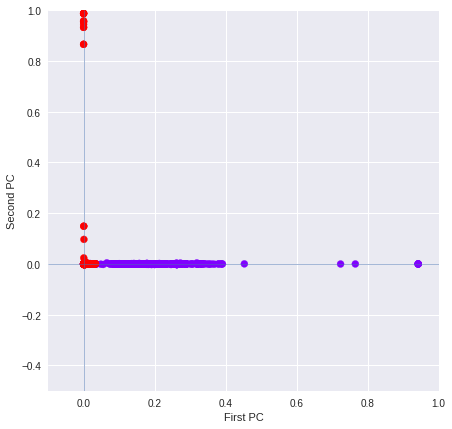

In [101]:
plt.figure(figsize=(7,7))
pc_1 = latent_semantic_analysis['component_1'].values
pc_2 = latent_semantic_analysis['component_2'].values

plt.scatter(pc_1, pc_2, c=df['class_numerical'], cmap='rainbow')

plt.xlabel('First PC')
plt.ylabel('Second PC')
plt.axvline(linewidth=0.5)
plt.axhline(linewidth=0.5)
plt.xlim(-.1,1)
plt.ylim(-.5,1)

(-0.1, 1)

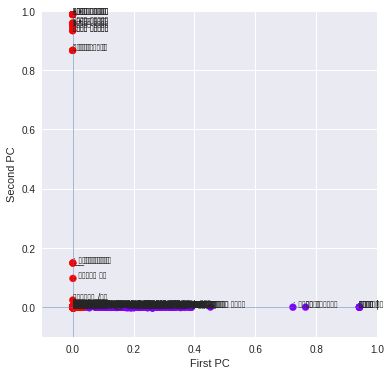

In [102]:
plt.figure(figsize=(6,6))
pc_1 = latent_semantic_analysis['component_1'].values
pc_2 = latent_semantic_analysis['component_2'].values

strings = df['cleaned_text'].values
for i, (x, y) in enumerate(zip(pc_1, pc_2)): 
    plt.text(x,y,strings[i][:10])

plt.scatter(pc_1, pc_2, c=df['class_numerical'], cmap='rainbow')

plt.xlabel('First PC')
plt.ylabel('Second PC')
plt.axvline(linewidth=0.5)
plt.axhline(linewidth=0.5)
plt.xlim(-.1,1)
plt.ylim(-.1,1)

(-0.3, 0.6)

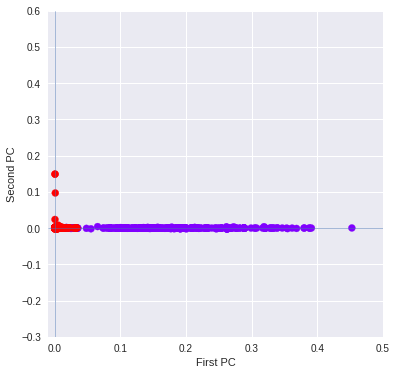

In [103]:
plt.figure(figsize=(6,6))
pc_1 = latent_semantic_analysis['component_1'].values
pc_2 = latent_semantic_analysis['component_2'].values

plt.scatter(pc_1, pc_2, c=df['class_numerical'], cmap='rainbow')

plt.xlabel('First PC')
plt.ylabel('Second PC')
plt.axvline(linewidth=0.5)
plt.axhline(linewidth=0.5)
plt.xlim(-.01,.5)
plt.ylim(-.3,.6)

In [104]:
eg_mask = latent_semantic_analysis['class'] == 'EG'

In [105]:
latent_semantic_analysis[eg_mask]

,component_1,component_2,cleaned_text,class
0,0.005628,0.000314,أزاي أقول لك كنا زمان ... والماضي كان فى الغيب بكره واللي أحنا فيه دلوقت كمان ... ح يفوت علينا ولا ندري,EG
1,0.003235,0.000391,هي آراء آه بس أزاي أجويرو منتهي يعني أمال لو مكنش الهداف التاريخي للسيتي و كل موسم اقل عدد من الاهداف…,EG
2,0.001990,0.000143,أنت صيني أزاي تقارن شادي بالخطيب ألي هو الوحيد ألي خد الكورة الذهبية من مصر وبشهادت الزملكاوي قبل الأ…,EG
3,0.005605,0.000426,أزاي الناس كانت بتغرد في الخمسينات قبل إختراع تويتر.,EG
4,0.018170,0.000034,التوينز اللي معاها كل الحلو والوحش والمصايب والاكل والفشل مش عارفه من غيرك كنت هعيش أزاي ربنا يخليكي ليا ومش تويته توصفك,EG
5,0.016596,0.000445,: عن الناس إلي ربنا بعتهالك عشان يقولك شوف آخر صبرك طلع حلو أزاي,EG
6,0.008033,0.000815,شوفت لما تجاهلت الناس وشك نور أزاي,EG
7,0.005158,0.000074,ده انا صاحيه من ساعه وزهقت هكمل أزاي بقيت اليوم من غير ما أنتحر,EG
8,0.016765,0.000682,أزاي اتعرفت علي افضل صديق/ة عندك/ي؟ — افضل صديقة عندي مع بعض من اولى ابتدائي مش فاكرة اتعرفنا ازاي,EG
9,0.035273,-0.000121,اكيد مكنتيش هتقدري تعيشي ي بنتي ، انتي م غيري ولا اي حاجة أصلاً انا عارفهه ، وعارفه أن مش تويته توصفني ده اكي…,EG


In [106]:
gulf_mask = latent_semantic_analysis['class'] == 'GULF'

In [107]:
latent_semantic_analysis[gulf_mask]

,component_1,component_2,cleaned_text,class
0,8.300281e-04,-9.018917e-05,: على الاقل ارحم من ان تتعود على وجود احد ويغرقك اهتمام وحب ويغنيك عن الدنيا وبنص الطريج يخليك تعاني وتت…,GULF
1,1.657562e-03,-1.899227e-04,وحدة مكافحة الموز في الطريج,GULF
2,6.787565e-03,-9.988934e-05,انا صوت الفريج وبنتٍ تناديك تدليك الفرح وينه انا ثوبك وسبحةٍ في يدك واللي راح من عمرك انا اشيله أدليك الطريج اللي…,GULF
3,2.899447e-03,-3.653068e-04,اوك مسافة الطريج يايتلچ ‍️‍️‍️,GULF
4,5.378612e-03,9.006512e-05,كلام جميل لكن وين التطبيق.طلع قانون للخدم ونشر بالجريدة الرسمية من زمان وللحين احنا ناطرين ا…,GULF
5,8.352712e-03,-1.415209e-04,الثالث علي الطريج طولي بالج اول الله️,GULF
6,1.886363e-03,-1.679862e-04,لما أكون مستعيله ويغلط السواق ف الطريج,GULF
7,9.210788e-04,2.758843e-06,احبك كثر ماتوقف على جنب الطريج اشجار احبك كثر مايقسى الشتا وتهاجر طيوره..,GULF
8,3.828331e-03,3.126708e-04,"لحد يسلمي الAUX ويقولي بسج توقفين بنص الاغنيه, الطريج دقايق وانا عندي اغنيه بسمعها!",GULF
9,3.015537e-04,4.032727e-05,انا نظامي اخليهم يسمعون اول دقايق والي بعده,GULF


In [ ]:
latent_semantic_analysis[(latent_semantic_analysis['class'] == 'EG') 
                         & (latent_semantic_analysis.component_2 > .050)]

In [ ]:
latent_semantic_analysis[(latent_semantic_analysis['class'] == 'GULF') 
                         & (latent_semantic_analysis.component_2 > .50)]